In [1]:
# ETHZ model: exploring the boosted model data
#
#
# Original: vikki.thompson 19/06/2023
# Last Editted 23/01/2024

In [1]:
## Load neccessary libraries
import warnings
warnings.filterwarnings('ignore')

import subprocess
import numpy as np
import iris
import sys
import matplotlib.pyplot as plt
sys.path.append('/usr/people/thompson/WP1/boosting')
import functions_boosting as gboost
sys.path.append('/usr/people/thompson/WP1')
import functions_get_data as gdata
import functions_plot_data as pdata
import iris.coord_categorisation as icc
from iris.coord_categorisation import add_season_membership
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs
import cartopy as cart
import glob
import matplotlib.cm as mpl_cm
import sys
import scipy.stats as sps
from scipy.stats import genextreme as gev
import random
import scipy.io
import xarray as xr
import netCDF4 as nc
import iris.coords
import iris.util
from iris.util import equalise_attributes
from iris.util import unify_time_units
from scipy.stats.stats import pearsonr
import calendar
import cartopy.feature as cf
plt.ion(); plt.show()

In [2]:
## Variables
R1 = [70, 30, 30, -30] # analog region
date = [2021, 'Jul', 14] # event date


## Inputs
plotdate = '20070825' # '20090829' '20160801'
rain_region = [52, 48, 9, 4]

In [4]:
# Observed event
mod = iris.load('/net/pc200023/nobackup/users/thompson/ETHZ/boosted_cubes/tp_'+plotdate+'.nc')[0]

#event_prec = gdata.var_event_data('tp', R1, [2021, 'Jul', 14])
#event = gdata.regrid(event_prec, mod) # regrid era-5 to model grid
# change to E-OBS
file = '/net/pc230042/nobackup_1/users/sager/ClimateExplorer/sandbox/ENSEMBLES/rr_0.25deg_reg_v30.0eu.nc'
eobs_cube = iris.load(file)[0]
iris.coord_categorisation.add_year(eobs_cube, 'time')
iris.coord_categorisation.add_season(eobs_cube, 'time')
iris.coord_categorisation.add_day_of_year(eobs_cube, 'time')
eobs_cube = eobs_cube.extract(iris.Constraint(season='jja'))
eobs_cube = eobs_cube.extract(iris.Constraint(year=2021))
eobs_cube = eobs_cube.extract(iris.Constraint(day_of_year=195))
lat_con = iris.Constraint(latitude=lambda cell: 40 < cell < 60)
lon_con = iris.Constraint(longitude=lambda cell: -10 < cell < 20)
event_prec = eobs_cube.extract(lat_con&lon_con)
event = gdata.regrid(event_prec, mod) # regrid era-5 to model grid


rain = gboost.extract_region(event, rain_region)
era_rain_mean = rain.collapsed(['latitude', 'longitude'], iris.analysis.MEAN).data
era_rain_max = rain.collapsed(['latitude', 'longitude'], iris.analysis.MAX).data

print('Region mean = ', era_rain_mean)
print('Region max =', era_rain_max)

Region mean =  36.950073
Region max = 97.40026


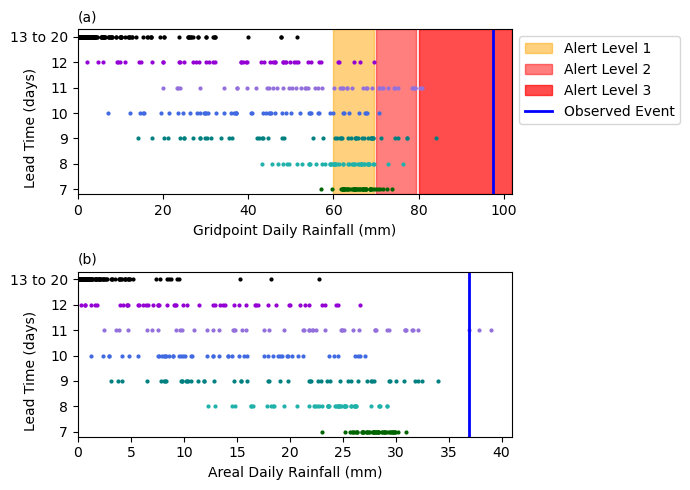

In [17]:
fig1, axs = plt.subplots(nrows=2, ncols=1, figsize=(7,5))
tp_fields_list = iris.load('/net/pc200023/nobackup/users/thompson/ETHZ/boosted_cubes/tp_'+plotdate+'.nc')
tp_fields_list.sort(key=lambda cube: cube.coord('startdate').points) # Fix random cubelist ordering
rain_region_str = str(rain_region[1])+'-'+str(rain_region[0])+'N; '+str(rain_region[3])+'-'+str(rain_region[2])+'E'
rain_mean = []; rain_max = []
for each in tp_fields_list:
    rain = gboost.extract_region(each, rain_region)
    rain_mean.append(rain.collapsed(['latitude', 'longitude'], iris.analysis.MEAN).data)
    rain_max.append(rain.collapsed(['latitude', 'longitude'], iris.analysis.MAX).data)


axs[0].fill_between([60,69.5], 6.8, 13.3, color='orange', alpha=.5, label='Alert Level 1')
axs[0].fill_between([70,79.5], 6.8, 13.3, color='red', alpha=.5, label='Alert Level 2')
axs[0].fill_between([80,102], 6.8, 13.3, color='red', alpha=.7, label='Alert Level 3')
for i in np.arange(7):
    axs[0].plot(rain_max[i], [13]*50, 'o', color='k', markersize=2)

axs[0].plot(rain_max[6], [13]*50, 'o', color='k', markersize=2)
axs[0].plot(rain_max[-1], [7]*50, 'o', color='darkgreen', markersize=2)
axs[0].plot(rain_max[-2], [8]*50, 'o', color='lightseagreen', markersize=2)
axs[0].plot(rain_max[-3], [9]*50, 'o', color='teal', markersize=2)
axs[0].plot(rain_max[-4], [10]*50, 'o', color='royalblue', markersize=2)
axs[0].plot(rain_max[-5], [11]*50, 'o', color='mediumpurple', markersize=2)
axs[0].plot(rain_max[-6], [12]*50, 'o', color='darkviolet', markersize=2)
axs[0].axvline(era_rain_max, color='b', linewidth=2, label='Observed Event')
axs[0].set_title('(a)', fontsize=10, loc='left')
axs[0].set_xlabel('Gridpoint Daily Rainfall (mm)')
axs[0].set_yticks(np.arange(7,14,1))
axs[0].set_yticklabels(['7', '8', '9', '10', '11', '12', '13 to 20'])
axs[0].set_ylabel('Lead Time (days)', y=.4, labelpad=-20)
axs[0].set_ylim([6.8, 13.3])
axs[0].set_xlim([0, 102])
axs[0].legend(bbox_to_anchor=(1, 1))

for i in np.arange(7):
    axs[1].plot(rain_mean[i], [13]*50, 'o', color='k', markersize=2)

axs[1].plot(rain_mean[-1], [7]*50, 'o', color='darkgreen', markersize=2)
axs[1].plot(rain_mean[-2], [8]*50, 'o', color='lightseagreen', markersize=2)
axs[1].plot(rain_mean[-3], [9]*50, 'o', color='teal', markersize=2)
axs[1].plot(rain_mean[-4], [10]*50, 'o', color='royalblue', markersize=2)
axs[1].plot(rain_mean[-5], [11]*50, 'o', color='mediumpurple', markersize=2)
axs[1].plot(rain_mean[-6], [12]*50, 'o', color='darkviolet', markersize=2)
axs[1].axvline(era_rain_mean, color='b', linewidth=2)
axs[1].set_xlabel('Areal Daily Rainfall (mm)')
axs[1].set_title('(b)', fontsize=10, loc='left')
axs[1].set_yticks(np.arange(7,14,1))
axs[1].set_yticklabels(['7', '8', '9', '10', '11', '12', '13 to 20'])
axs[1].set_ylabel('Lead Time (days)', y=.4, labelpad=-20)
axs[1].set_ylim([6.8, 13.3])
axs[1].set_xlim([0, 41])


plt.tight_layout()

plt.savefig('ThompsonBoosting_Fig2.png', dpi=80)